## Double Dealing Usecase
- Basic Data Wrangling
- Score Polarity
- Conditional Formating
- Basic Exploratory Analysis

# Installation
- `pip install pandas`
- `pip install textblob`
- `pip install seaborn`

## Import basic python packages

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 700)
pd.set_option('display.width', 2000)

## Read the dataset and convert to pandas dataframes.

In [2]:
df = pd.read_csv('feedback.csv', encoding = "ISO-8859-1", engine='python')
df.columns

Index(['Timestamp', 'Designation', 'Effective', 'Presentation', 'Interested', 'Q1', 'Q2', 'Q3', 'Topic Excited', 'Do you wish to attend similar webinar's', 'Why did you choose this webinar?', 'Overall rating ', 'Comments'], dtype='object')

## Preview the dataframe

In [3]:
df.head()

,Timestamp,Designation,Effective,Presentation,Interested,Q1,Q2,Q3,Topic Excited,Do you wish to attend similar webinar's,Why did you choose this webinar?,Overall rating,Comments
0,6/1/20 11:48,Student,Neutral,Neutral,Neutral,Jon,EasyBuy,Exercise,Valuable,Yes,Job Demands,5,Excellent
1,6/1/20 11:48,Student,Agree,Strongly agree,Strongly agree,Jon,SimplyBuy,GST,Techniques more important than tools,Yes,Interest,5,It was a good webinar in understanding how to ...
2,6/1/20 11:49,Faculty,Agree,Strongly agree,Strongly agree,Sam,SimplyBuy,GST,It was practical and live session,Yes,Interest,4,Very informative session
3,6/1/20 11:49,Student,Strongly agree,Strongly agree,Strongly agree,Jon,SimplyBuy,GST,Useful,Yes,Interest,5,More courses and Intrest
4,6/1/20 11:49,Student,Strongly agree,Strongly agree,Strongly agree,Tyrion,IdeaBy,Exercise,All were good,Yes,Interest,5,Everything was fine


## How effective was the lecture

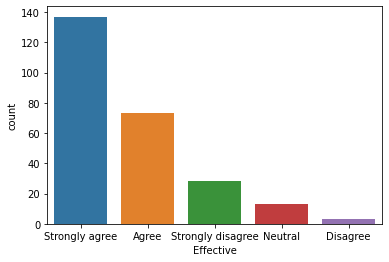

In [5]:
df['Effective'].value_counts()
eff_lecture = sns.countplot(data=df, x='Effective', 
                            order=df['Effective'].value_counts().index)

## How effective was the presentation

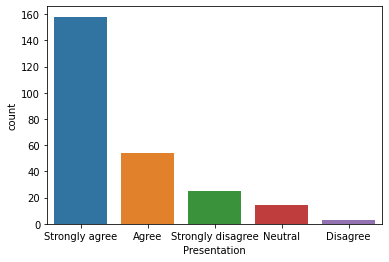

In [6]:
sns.countplot(data=df, x='Presentation', 
              order=df['Presentation'].value_counts().index)

## Did session Triggered Data Science Interest

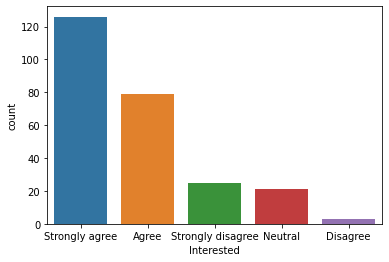

In [7]:
sns.countplot(data=df, x='Interested', 
              order=df['Interested'].value_counts(normalize=True).index)

## Findings
Based on the given dataset we can see there are few people who `strongly disagree` and `disagree`, we need such feedbacks to improve our quality.

## But wait a second!!

In [8]:
df[df['Effective'] == 'Strongly disagree'].style\
    .format({'Overall rating ': "{:.1f}"})\
    .bar(subset=["Overall rating "], color='lightgreen')

,Timestamp,Designation,Effective,Presentation,Interested,Q1,Q2,Q3,Topic Excited,Do you wish to attend similar webinar's,Why did you choose this webinar?,Overall rating,Comments
6,6/1/20 11:49,Faculty,Strongly disagree,Strongly disagree,Strongly disagree,Tyrion,SimplyBuy,GST,Clear explanation,Yes,Interest,5.0,Nice
14,6/1/20 11:50,Faculty,Strongly disagree,Strongly disagree,Strongly disagree,Jon,EasyBuy,Medicine,data analysis examples,Yes,Interest,5.0,Very informative
18,6/1/20 11:50,Student,Strongly disagree,Strongly disagree,Strongly disagree,Jon,SimplyBuy,GST,Most valuable,Yes,Job Demands,4.0,Informative session
21,6/1/20 11:50,Faculty,Strongly disagree,Agree,Agree,Jon,IdeaBy,Medicine,Most useful,Yes,Interest,4.0,Effective seminar
24,6/1/20 11:50,Student,Strongly disagree,Strongly disagree,Strongly disagree,Sam,SimplyBuy,Exercise,It's very informative session.,Yes,Interest,5.0,I attend your every session of data science.and Want to know more about data science and graph data science
25,6/1/20 11:50,Student,Strongly disagree,Strongly disagree,Strongly disagree,Tyrion,IdeaBy,Medicine,No comments,Yes,Interest,5.0,Great experience with data science
26,6/1/20 11:50,Faculty,Strongly disagree,Strongly disagree,Strongly disagree,Tyrion,SimplyBuy,Medicine,Good,Yes,Interest,5.0,Thanks
31,6/1/20 11:51,Faculty,Strongly disagree,Strongly disagree,Strongly disagree,Jon,SimplyBuy,GST,Data Science concept,Yes,Interest,5.0,Good
32,6/1/20 11:51,Student,Strongly disagree,Strongly disagree,Strongly disagree,Tyrion,SimplyBuy,Exercise,Valuable for feature,Yes,Interest,4.0,Very nice
59,6/1/20 11:52,Faculty,Strongly disagree,Strongly disagree,Strongly disagree,Sam,SimplyBuy,GST,I understand what is data science and its use.,Yes,Interest,5.0,Very informative webinar Thank you


## Let's calculate sentiment of comments

We can use the Textblob library to calculate the polarity score
`pip install textblob`

### Polarity
- -1 Negative
- 0 Neutral
- 1 Positive

In [11]:
from textblob import TextBlob

# Score value between 
def sentiment(t):
    score = TextBlob(str(t))
    return score.sentiment.polarity

## df.insert(5, 'polarity', df['Comments'].apply(lambda x: sentiment(x)))

df.head()

,Timestamp,Designation,Effective,Presentation,Interested,polarity,Q1,Q2,Q3,Topic Excited,Do you wish to attend similar webinar's,Why did you choose this webinar?,Overall rating,Comments
0,6/1/20 11:48,Student,Neutral,Neutral,Neutral,1.000000,Jon,EasyBuy,Exercise,Valuable,Yes,Job Demands,5,Excellent
1,6/1/20 11:48,Student,Agree,Strongly agree,Strongly agree,0.700000,Jon,SimplyBuy,GST,Techniques more important than tools,Yes,Interest,5,It was a good webinar in understanding how to ...
2,6/1/20 11:49,Faculty,Agree,Strongly agree,Strongly agree,0.200000,Sam,SimplyBuy,GST,It was practical and live session,Yes,Interest,4,Very informative session
3,6/1/20 11:49,Student,Strongly agree,Strongly agree,Strongly agree,0.500000,Jon,SimplyBuy,GST,Useful,Yes,Interest,5,More courses and Intrest
4,6/1/20 11:49,Student,Strongly agree,Strongly agree,Strongly agree,0.416667,Tyrion,IdeaBy,Exercise,All were good,Yes,Interest,5,Everything was fine


## Let's have birdeye view

In [12]:
# Define Conditional Formation
def color_code(val):
    return [
        
        'background-color: #32CC32' if v == 'Strongly agree' else ''
        'background-color: #C0FF02' if v == 'Agree' else '' 
        'background-color: #87ceeb' if v == 'Neutral' else ''
        'background-color: #87ceeb' if v == 'Disagree' else ''
        'background-color: orange'  if v == 'Strongly disagree' else '' for v in val]



In [13]:
formated_df = df[['Effective', 'Presentation',
    'Interested', 'Overall rating ', 'polarity', 'Q1', 'Q2', 'Q3']].style.apply(color_code)\
    .format({"polarity": "{:,.2f}", "Overall rating ": "{:.1f}"})\
    .bar(subset=["polarity"], color='lightgreen')\
    .bar(subset=["Overall rating "], color="#32CC32")

## Focus on Strongly Disagree & Disagree

In [14]:
formated_df.data[formated_df.data['Effective']=='Strongly disagree']\
    .style.apply(color_code).format({"polarity": "{:,.2f}"})\
    .background_gradient(cmap='Greens')

,Effective,Presentation,Interested,Overall rating,polarity,Q1,Q2,Q3
6,Strongly disagree,Strongly disagree,Strongly disagree,5,0.60,Tyrion,SimplyBuy,GST
14,Strongly disagree,Strongly disagree,Strongly disagree,5,0.20,Jon,EasyBuy,Medicine
18,Strongly disagree,Strongly disagree,Strongly disagree,4,0.00,Jon,SimplyBuy,GST
21,Strongly disagree,Agree,Agree,4,0.60,Jon,IdeaBy,Medicine
24,Strongly disagree,Strongly disagree,Strongly disagree,5,0.50,Sam,SimplyBuy,Exercise
25,Strongly disagree,Strongly disagree,Strongly disagree,5,0.80,Tyrion,IdeaBy,Medicine
26,Strongly disagree,Strongly disagree,Strongly disagree,5,0.20,Tyrion,SimplyBuy,Medicine
31,Strongly disagree,Strongly disagree,Strongly disagree,5,0.70,Jon,SimplyBuy,GST
32,Strongly disagree,Strongly disagree,Strongly disagree,4,0.78,Tyrion,SimplyBuy,Exercise
59,Strongly disagree,Strongly disagree,Strongly disagree,5,0.20,Sam,SimplyBuy,GST
